In [1]:
import numpy as np
from tr_functions.general import GeneralModel
from tr_functions.gaussian import GaussianModel
from tr_functions.kppv import KppvModel
from tr_functions.parzen import ParzenModel
from tr_functions.linear import LinearSeparationModel

In [2]:
split_data_tp1_app = GeneralModel.open_file('data/data_tp1_app.txt')
split_data_tp1_dec = GeneralModel.open_file('data/data_tp1_dec.txt')

split_data_tp2_app = GeneralModel.open_file('data/data_tp2_app.txt')
split_data_tp2_dec = GeneralModel.open_file('data/data_tp2_dec.txt')

split_data_tp3_app = GeneralModel.open_file('data/data_tp3_app.txt')
split_data_tp3_dec = GeneralModel.open_file('data/data_tp3_dec.txt')

## Analyse visuelle
### Dataset 1

In [3]:
# general = GeneralModel()
# general.train_data = split_data_tp1_app
# general.test_data = split_data_tp1_dec
# general.plot_all_data()

On remarque que les jeux de données d'apprentissage (croix plus claires) et de test (points sombres) se superposent relativement bien a l'exception de quelques outliers dans chaque classe. Normalement les différents modèles devraient séparer les classes avec une bon niveau de confiance. Dans cet exemple, la séparation des classes peut se faire manuellement. 

### Dataset 2

In [4]:
# general = GeneralModel()
# general.train_data = split_data_tp2_app
# general.test_data = split_data_tp2_dec
# general.plot_all_data()

Contrairement au premier jeu de données, les classes semblent plus diffusent que ce soit pour les jeux d'apprentissage et de test. En revanche on remarque que les classes sont constante entre les deux jeux de données. Les résultats des différents modèles seront moins bon que pour le premier jeu. La séparation des classes peut se faire manuellement avec quelques difficultés.

### Dataset 3

In [5]:
# general = GeneralModel()
# general.train_data = split_data_tp3_app
# general.test_data = split_data_tp3_dec
# general.plot_all_data()

Ce troisième jeu de données est totalement mélangé. Visuellement on ne peut pas distinguer de classes. En revanche comme pour les deux précédents jeux on remarque les classes d'apprentissage et de tests se supperposent bien. Dans ce cas précis une analyse manuelle est impossible. Il est probable que ce jeu de données donne les moins bon résultats pour les différents modèles. 

## Estimation gaussienne (euclidienne)

### Dataset 1

In [6]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp1_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp1_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()


L'analyse du jeu de données d'apprentissage avec la position de chaque classe représenté en par les croix noires montre une répartition bien visible. L'analyse du jeux de test montre un taux de Top 1 de 99,2% et de Top 2 de 100%. On peut donc en déduire que la méthode de l'estimation gaussienne avec distance euclidienne prédit de manière efficace les classes. Sur les 500 classes à prédire 496 sont bien classés.
Le deuxième graphique représente le jeu de données tests avec les classes en croix noires. Les couleurs des points représentent les classes prédites et les contours représentent les classes théoriques. On remarque que les 4 classes mal placées sont des classes qui peuvent être considéré comme des outliers, car posisitionné entre deux groupes de classes. 

### Dataset 2

In [7]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp2_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp2_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Comme précédement on remarque que les centres de classes sont bien positionnés par rapport aux classes. Comparé au précédent dataset les résultats sont un peu moins bon avec seulement 94% en Top 1. Lorsque l'on regarde la matrice de confusion on remarque que la classe numéro 3 est la classe la moins bien classée. En analysant le graphique on remarque la classe 3 (verte) a de nombreux points proche des centres de classes 5 et 2. De plus on remarque que les 6 points mal classés de la classe 4 sont placé dans la classe 3. La méthode est donc un peu moins bonne lorsque les données se chevauchent.  

### Dataset 3

In [8]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp3_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "euclidian"
# gaussian_model.test_model(split_data_tp3_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Pour le dataset 3 on remarque que les différentes classes sont mélangé car les plages de valeurs sont plus larges. Le résultat en Top 1 est de seulement 73%, et le Top 2 ne monte qu'à 89% soit moins que les deux autres datasets. Lorsque l'on étudie la matrice de confusion, on remarque que la classe la moins bien classé avec seulement 43% de bon est la classe 1. En comparant avec le graphique on remarque que la classe 1 est au centre des quatre autres. Donc ces points ce mélange avec ces classes, comme on peut le voir dans la matrice. Les résultats des autres classes sont meilleurs car elles ont de nombreux points à l'extérieur des classes, donc sans ambiguité. 

### Distance de mahalanobis

#### Dataset 1

In [9]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp1_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp1_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Gaussian model created
Classes centers created
Class = 1 has a center = [4.884009160000003, -4.993250990000002]
Class = 2 has a center = [5.021350009999999, 5.22781893]
Class = 3 has a center = [0.03402201000000008, -0.16684774000000008]
Class = 4 has a center = [-4.679924409999999, 4.945550710000001]
Class = 5 has a center = [-4.977598800000001, -5.127728420000003]


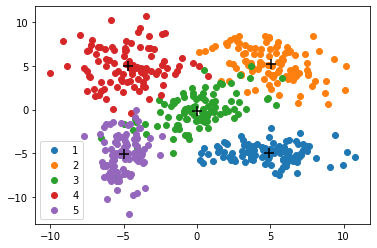

Results :
----------------

Top results :
----------------
Top 1 rate :  0.946
Top 2 rate :  0.996
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   2 │  97 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   5 │  84 │   1 │  10 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   6 │  94 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   2 │   0 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


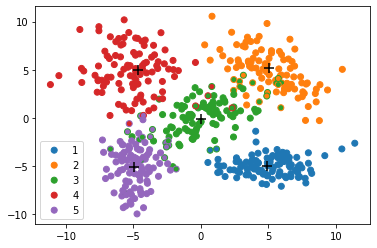

In [27]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp2_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp2_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

Gaussian model created
Classes centers created
Class = 1 has a center = [-0.18975552999999987, 0.16551614999999997]
Class = 2 has a center = [2.8317632400000003, 3.1425455499999995]
Class = 3 has a center = [-2.743207609999999, 2.7806047900000017]
Class = 4 has a center = [-3.0896952, -3.1509188299999993]
Class = 5 has a center = [2.9589284900000004, -2.8782988199999995]


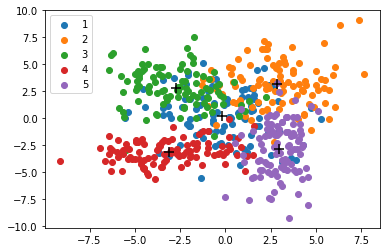

Results :
----------------

Top results :
----------------
Top 1 rate :  0.728
Top 2 rate :  0.894
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  43 │  17 │  16 │  12 │  12 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  12 │  83 │   3 │   0 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  16 │   4 │  78 │   2 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  16 │   0 │   7 │  74 │   3 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   9 │   0 │   0 │  86 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


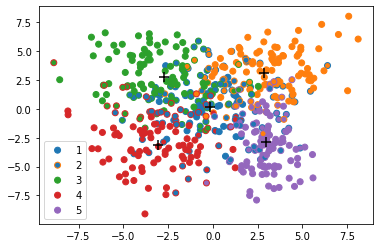

In [26]:
# gaussian_model = GaussianModel()
# gaussian_model.gaussian_fit_model(split_data_tp3_app)
# gaussian_model.print_classes_centers()
# gaussian_model.plot_train_data()
# gaussian_model.compute_method = "mahalanobis"
# gaussian_model.test_model(split_data_tp3_dec)
# gaussian_model.print_model_result()
# gaussian_model.plot_test_data()

La deuxième analyse réalisée sur les 3 datasets avec l'utilisation de la distance de Mahalanobis n'améliore pas les résultats de Top 1 et un tout petit peu ceux de Top 2 pour le dataset numéro 3. Donc utiliser une distance de Mahalanobis peu être recommandé pour des données moins bien discriminé. Et couplé avec une méthode de bagging. 

### Comparaison avec scikit learn


In [12]:
# from sklearn.mixture import GaussianMixture
# gm = GaussianMixture(n_components=2, random_state=0).fit(X)
# gm.predict([[0, 0], [12, 3]])


## K plus proches voisins

### Analyse à 1ppv

#### Dataset 1

In [13]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

L'analyse par kppv à 1 voisin, montre un bon taux de classement pour le premier jeu de données. En effet on remarque que le taux de bonne classification est de 99%. La matrice de confusion montre que 4 valeurs on été mal classées. Le graphique indique que ces 4 valeurs ont des positions ambigues entre deux classes. 

#### Dataset 2

Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.92
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  89 │  11 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   4 │  83 │   2 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  96 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   7 │   1 │  92 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


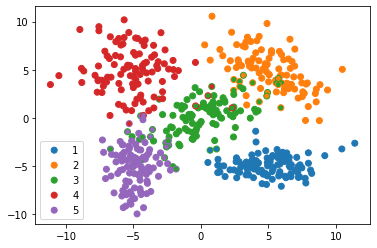

In [14]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Les résultats de classifications avec un 1 plus proche voisin montre un taux de bonne classification moins bon que celui du dataset 1 et aussi moins bon qu'avec la methode d'estimation gaussienne (92% de top 1 contre 94% avec l'estimation). Comme pour la précédente méthode, la classe la moins bien classé est la 3. Donc un plus proche voisin ne permet pas distinguer les points se trouvant plus vers d'autres classes, comme le montre le graphique de résultats de tests.

#### Dataset 3

Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.646
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  34 │  20 │  19 │  14 │  13 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  14 │  76 │   4 │   1 │   5 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  24 │   4 │  71 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  19 │   2 │  12 │  65 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │  15 │   7 │   1 │   0 │  77 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


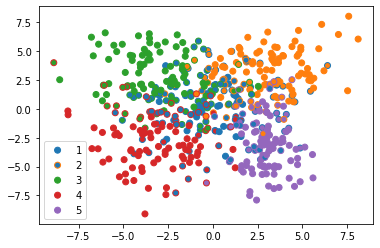

In [15]:
# kppv = KppvModel()
# kppv.k = 1
# kppv.vote_method = "unanimous"
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

La classification du troisième dataset avec un plus proche voisin est mauvaise. En effet seul 65% des points sont bien classés. Ce résultat est moins bon que celui de l'estimation gaussienne (73%). Comme pour cette méthode la classe la moins classé est la classe 1. Cette classe est centrale donc tout les points se mélangent en partie avec les autres. 

### kppv avec cross-validation

Nous allons maintenant essayer de trouver le meilleur K possible pour chaque dataset par cross-validation. Un fois ce k trouvé, on va l'utiliser avec le jeu de données de test. Et voir si un K > 1 améliore le taux de bonne classification. Pour cela nous allons comparer deux méthodes pour chaque jeux de données, un vote à la majorité et à l'unanimité.

#### Dataset 1

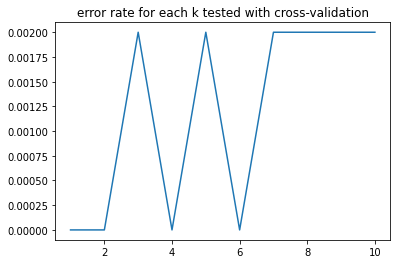

The best k found is 1 with a error rate = 0.0
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
Top 2 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


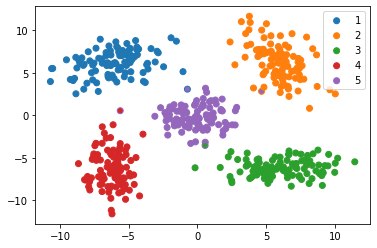

In [16]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

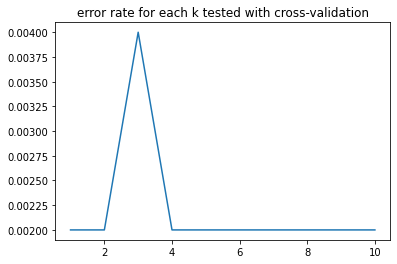

The best k found is 1 with a error rate = 0.0020000000000000018
Will use k = 1 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.992
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  99 │   0 │   0 │   1 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   0 │   0 │ 100 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   0 │ 100 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   1 │  98 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


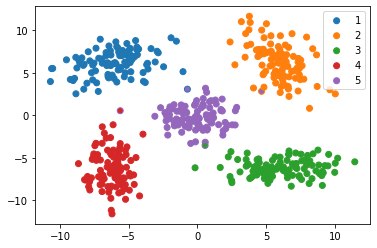

In [17]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp1_app, 10, 5)
# kppv.compute_kppv(split_data_tp1_app, split_data_tp1_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour le premier jeu de données, chercher le meilleur K avec la cross-validation n'est pas nécéssaire. En effet, ce jeu de données est suffisament bien discriminé. Donc le meilleur k trouvé est 1. Sachant que pour k = 1, les votes à la majorité et à l'unanimité sont identiques on ne peut pas conclure sur le efficacité. On obtient donc les même résultats que précédement.

#### Dataset 2

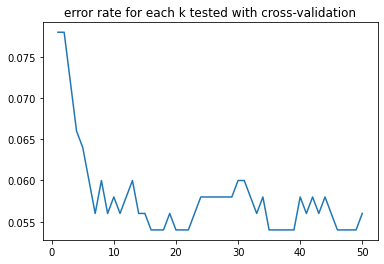

The best k found is 17 with a error rate = 0.05399999999999994
Will use k = 17 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.948
Top 2 rate :  0.99
Error rate :  0.002
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  99 │   0 │   1 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  96 │   4 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   2 │   5 │  84 │   1 │   8 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   4 │  96 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


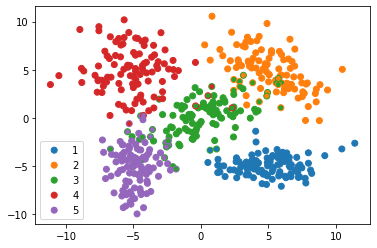

In [24]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

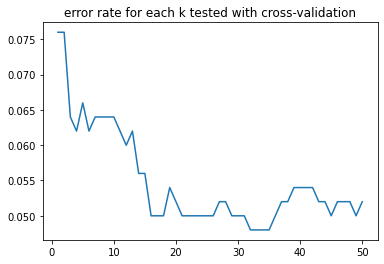

The best k found is 32 with a error rate = 0.04800000000000004
Will use k = 32 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.474
Error rate :  0.524
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │ 100 │   0 │   0 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   0 │  98 │   2 │   0 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │   1 │   5 │  84 │   1 │   9 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │   0 │   0 │   3 │  97 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   0 │   0 │   1 │   0 │  99 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


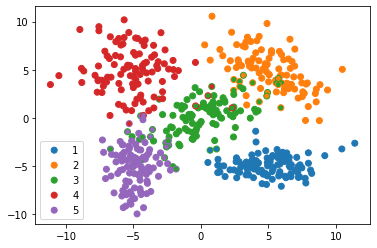

In [25]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp2_app, 50, 5)
# kppv.compute_kppv(split_data_tp2_app, split_data_tp2_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour l'analyse du deuxième jeu de données, on remarque une grosse disparité entre les votes à la majorité et à l'unanimité. Dans les deux cas, la cross-validation trouve une valeur de K optimal = **TODO**. Les K supérieur ont des taux d'erreur supérieur ce qui pourrait être dû au sur-apprentissage. Lorsque que l'on compare les résultats sur le jeu de test, on remarque que pour le vote à la majorité le taux de Top 1 a augmenté en passant de 92% à **TODO**%. En revanche pour le vote à l'unanimité, le taux de Top 1 est de seulement **TODO** avec un taux d'erreur de **TODO**. Ce taux Top 1 faible est dû aux cas ou il y a plusieurs classes possible trouvé. Le vote à l'unanimité ne peux pas gérer ces cas alors que celui à la majorité oui. L'étude des tableaux ou des graphs montre des résultats similaire entre les deux. En effet j'ai décidé de remplir les tableaux sans tenir compte des erreurs. Dans tous les cas le tableau est rempli avec la valeur majoritaire. La différence entre les tableaux est donc expliqué uniquement par la différence de K. Dans ce cas on remarque qu'un K **TODO** donne un meilleur résultats.

#### Dataset 3

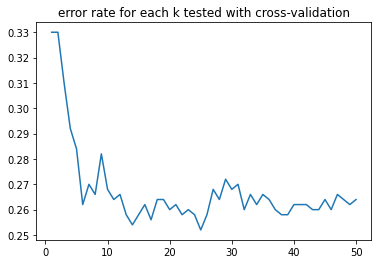

The best k found is 25 with a error rate = 0.252
Will use k = 25 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.708
Top 2 rate :  0.856
Error rate :  0.024
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  35 │  19 │  19 │  12 │  15 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │   8 │  80 │   6 │   0 │   6 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  13 │   3 │  83 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  18 │   0 │   8 │  72 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   4 │   6 │   0 │   0 │  90 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


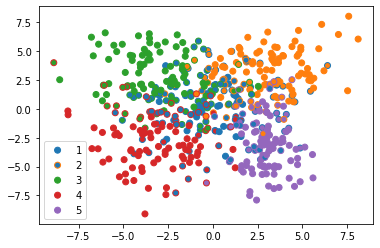

In [20]:
# kppv = KppvModel()
# kppv.vote_method = "majority"
# kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

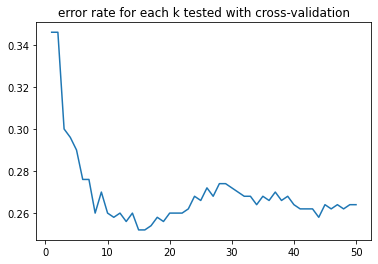

The best k found is 15 with a error rate = 0.252
Will use k = 15 neighbours
Results :
----------------

Top results :
----------------
Top 1 rate :  0.144
Error rate :  0.848
----------------

Confusion matrix :
----------------
╒════╤═════╤═════╤═════╤═════╤═════╕
│    │   1 │   2 │   3 │   4 │   5 │
╞════╪═════╪═════╪═════╪═════╪═════╡
│  1 │  34 │  19 │  19 │  13 │  15 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  2 │  11 │  78 │   5 │   0 │   6 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  3 │  13 │   5 │  81 │   1 │   0 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  4 │  18 │   0 │  10 │  70 │   2 │
├────┼─────┼─────┼─────┼─────┼─────┤
│  5 │   5 │   5 │   0 │   0 │  90 │
╘════╧═════╧═════╧═════╧═════╧═════╛
----------------


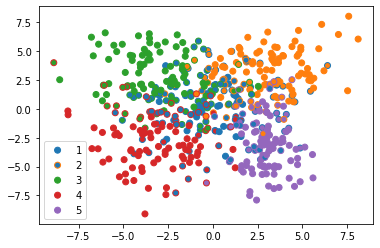

In [21]:
# kppv = KppvModel()
# kppv.vote_method = "unanimous"
# kppv.get_k_cross_validation(split_data_tp3_app, 50, 5)
# kppv.compute_kppv(split_data_tp3_app, split_data_tp3_dec)
# kppv.print_model_result()
# kppv.plot_test_data()

Pour ce dernier jeu de données, sont similaire à ceux du deuxième jeu de données. En effet, les valeurs de K trouvés par cross-validation sont similaire, comme précédement les taux Top 1 sont meilleurs pour le vote à la majorité. Et encore une fois lorsque l'on compare les résultats du tableau et du graphique on remarque qu'un K plus grand permet de meilleurs résultats donc ce n'est pas le sur-apprentissage qui explique l'augmentation du taux d'erreur lors de la cross-validation. 

La méthode de classification par Kppv ne semble pas plus performante que l'estimation gaussienne alors que le modèle est plus lent et plus complexe. 

### Comparaison avec scikit-learn

## Methode de Parzen
Comme précédement pour le kppv, la méthode de Parzen est un modèle paramétrique. Dans ce cas le paramètre est noté h et correspond à la largeur de la fonction uniforme ou à l'écart-type de la fonction gaussienne. Comme précédement, cet hyper-paramètre doit être trouvé. Nous allons donc utiliser la méthode de la cross-validation. En effet étudier le modèle avec un h aléatoire n'est pas pertinent. 
### Noyau uniforme
#### Dataset 1

In [22]:
parzen = ParzenModel()
h_list = np.arange(0.2, 2, 0.1)
parzen.method = "uniform"
parzen.get_h_cross_validation(split_data_tp1_app, h_list, 5)
parzen.compute_parzen(split_data_tp1_app, split_data_tp1_dec)
parzen.print_model_result()

In [23]:
# linear = LinearSeparationModel()
# model = linear.linear_train(split_data_tp1_app, True)
# linear.print_model()
# linear.test_linear_model(split_data_tp1_dec, model)
# linear.print_model_result()
# linear.plot_test_data()